<h1>Linear regression: Training and Validation Data</h1> 

# Import libraries

In [1]:
import os
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

os.environ['KMP_DUPLICATE_LIB_OK']='True'

<h2 id="Makeup_Data">Make Some Data</h2>

First, we'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.

In [2]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create two objects: one that contains training data and a second that contains validation data. Assume that the training data has the outliers. 

In [3]:
# Create training dataset and validation dataset
import torch
train_data = Data()
val_data = Data(train = False)

Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:

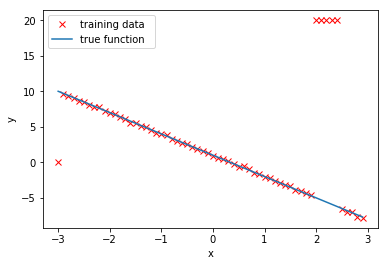

In [4]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2 id="Makeup_Data">Make Some Data</h2>

First, we'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.

In [5]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create two objects: one that contains training data and a second that contains validation data. Assume that the training data has the outliers. 

In [6]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:

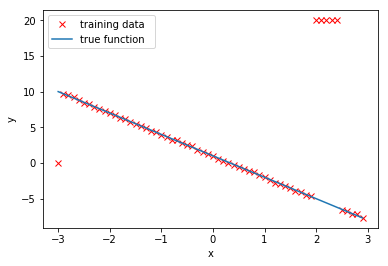

In [7]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create the criterion function and a <code>DataLoader</code> object: 

In [9]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<!--Empty Space for separating topics-->

<h2 id="LR_Hyper">Different learning rates and Data Structures to Store results for different Hyperparameters</h2>

Create a list with different learning rates and a tensor (can be a list) for the training and validating cost/total loss. Include the list MODELS, which stores the training model for every value of the learning rate. 

In [10]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]